In [ ]:
! pip install transformers
! pip install datasets
! pip install scipy
! pip install scikit-learn
! pip install huggingface_hub
! pip install pyreadr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 7.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import transformers
from tqdm import tqdm

In [ ]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer

device = 'cuda'

model = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-14m",
  revision="step143000",
  cache_dir="./pythia-1b/step143000",
).to(device)

tokenizer = AutoTokenizer.from_pretrained(
  "EleutherAI/pythia-14m",
  revision="step143000",
  cache_dir="./pythia-1b/step143000",
)

In [ ]:
!pip install git+https://github.com/UIUCLearningLanguageLab/AOCHILDES

  Cloning https://github.com/UIUCLearningLanguageLab/AOCHILDES to /tmp/pip-req-build-puq14esk
  Running command git clone --filter=blob:none --quiet https://github.com/UIUCLearningLanguageLab/AOCHILDES /tmp/pip-req-build-puq14esk
  Resolved https://github.com/UIUCLearningLanguageLab/AOCHILDES to commit e25348138282c35f4270800e592676b8713e67a1
  Preparing metadata (setup.py) ... done
  Created wheel for aochildes: filename=aochildes-3.0.0-py3-none-any.whl size=41322875 sha256=3e8745e0ae8c0e85c89376c547dd5d66a82f9688708f958df84f1ea3d23a4f0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-1y038jsv/wheels/b7/9e/c5/cd013d6d40aa0309899f3232a4779e769b222d7bec7e8724d3
Successfully built aochildes


In [ ]:
!git clone https://github.com/evaportelance/multilingual-aoa-prediction/

Cloning into 'multilingual-aoa-prediction'...
remote: Enumerating objects: 5371, done.
remote: Counting objects: 100% (327/327), done.
remote: Compressing objects: 100% (283/283), done.
remote: Total 5371 (delta 101), reused 233 (delta 41), pack-reused 5044
Receiving objects: 100% (5371/5371), 736.59 MiB | 14.44 MiB/s, done.
Resolving deltas: 100% (633/633), done.
Updating files: 100% (4670/4670), done.


In [ ]:
from aochildes.dataset import AOChildesDataSet
transcripts = AOChildesDataSet().load_transcripts()

Looking for transcripts in /usr/local/lib/python3.10/dist-packages/aochildes/original_transcripts
Utterances before dropping rows: 1,379,962
Utterances after  dropping rows: 1,180,889
Preparing AOCHILDES transcripts...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


In [ ]:
import re
for i, _ in enumerate(transcripts):
    transcripts[i] = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", transcripts[i]) # removing punctuation
    transcripts[i] = " ".join(transcripts[i].split()) # removing multiple spaces
    transcripts[i] = " " + transcripts[i]

In [ ]:
transcripts[1]

"let's go . we're gonna get some clothes . we're gonna get some clothes for catherine . yes please get his tub ready . we're gonna get some clothes for catherine and thomas . yes ! some pajamas . you gonna help me ? you're my helper ? let's see . let's see what he has . thomas has bugs . he has some bugs he can wear . do you like the bugs ? look at those bugs . yeah you like them don't you . yeah ! let's get see if thomas will like those . and let's see . you're trying to get them ? he needs what else . does he need some undies ? yes he does ! what do we have for thomas ? dinosaurs ! do you see the dinosaurs joseph ? there ! dinosaurs ! okay . and now it's time for miss catherine name ! what should we pick out for her ? let's see . help me close the windows ? did you wanna help me close the windows ? there it goes ! there it goes . okay have one more . let's see what catherine has . oh you're doing a big yawn ! are you sleepy ? are you my sleepy fellow ? hm . and you even have a little

In [ ]:
import numpy as np
lens = np.array([len(t) for t in transcripts])
print(lens.mean())

6493.469430992736


In [ ]:
encodings = tokenizer("\n".join(transcripts), return_tensors="pt")

In [ ]:
model.config

GPTNeoXConfig {
  "_name_or_path": "EleutherAI/pythia-14m",
  "architectures": [
    "GPTNeoXForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.1,
  "eos_token_id": 0,
  "hidden_act": "gelu",
  "hidden_dropout": 0.0,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 2048,
  "model_type": "gpt_neox",
  "num_attention_heads": 4,
  "num_hidden_layers": 6,
  "rope_scaling": null,
  "rotary_emb_base": 10000,
  "rotary_pct": 0.25,
  "tie_word_embeddings": false,
  "torch_dtype": "float16",
  "transformers_version": "4.35.0",
  "use_cache": true,
  "use_parallel_residual": true,
  "vocab_size": 50304
}

In [ ]:
while len(tqdm._instances) > 0:
    tqdm._instances.pop().close()

In [ ]:
mp = {}

import torch
from tqdm import tqdm

max_length = 2048
stride = 512
seq_len = encodings.input_ids.size(1) # 4451984

prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()

    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over valid labels
        # N.B. the model only calculates loss over trg_len - 1 labels, because it internally shifts the labels
        # to the left by 1.
        neg_log_likelihood = outputs.loss

    if target_ids[0][-1].item() not in mp:
        mp[target_ids[0][-1].item()] = []
    mp[target_ids[0][-1].item()].append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

100%|█████████▉| 10794/10798 [06:34<00:00, 27.37it/s]


In [ ]:
ppls = {}

In [ ]:
for k in mp:
    ppl = mp[k]
    word = tokenizer.decode([k])
    ppls[word] = float(torch.stack(ppl).mean())

In [ ]:
torch.stack(ppl).mean()

tensor(4.4201, device='cuda:0')

In [ ]:
ord = sorted(ppls.items(), key=lambda item: item[1], reverse=True)

In [ ]:
ord

[('ung', 5.447955131530762),
 ('mo', 5.442971229553223),
 (' listening', 5.441951274871826),
 (' scar', 5.299588203430176),
 (' team', 5.294390678405762),
 ('at', 5.29401159286499),
 (' asked', 5.260104179382324),
 (' elephant', 5.24612283706665),
 (' angrily', 5.238010883331299),
 ('apt', 5.2209601402282715),
 (' tick', 5.209277153015137),
 (' hall', 5.205306529998779),
 (' tucked', 5.2022705078125),
 (' dub', 5.195060729980469),
 (' par', 5.176027774810791),
 (' cliff', 5.171850204467773),
 (' disappeared', 5.149296760559082),
 (' choose', 5.146386623382568),
 ('ad', 5.130021572113037),
 (' turns', 5.129683494567871),
 (' missing', 5.125075817108154),
 (' base', 5.110117435455322),
 (' smart', 5.099916934967041),
 (' fruit', 5.096848487854004),
 (' turned', 5.092601776123047),
 (' arrives', 5.080474376678467),
 (' birds', 5.0792741775512695),
 (' ghost', 5.077394962310791),
 (' ruby', 5.073990345001221),
 (' heat', 5.071862697601318),
 (' clear', 5.0690999031066895),
 (' tractor', 5.

In [ ]:
import matplotlib.pyplot as plt

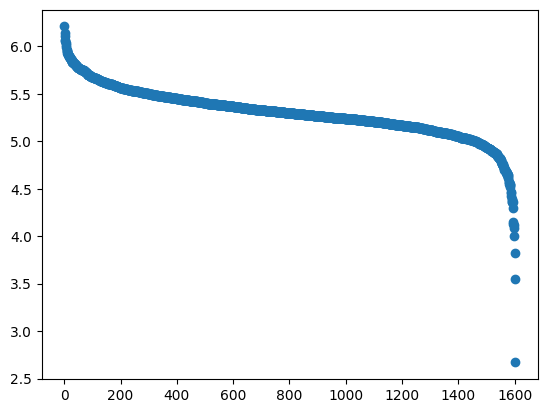

In [ ]:
plt.scatter([i for i in range(len(ord))], [o[1] for o in ord])

In [ ]:
sorted(ppls)

['\n',
 ' ',
 ' a',
 ' ab',
 ' about',
 ' actors',
 ' actually',
 ' adam',
 ' addition',
 ' admitted',
 ' after',
 ' afterwards',
 ' ag',
 ' again',
 ' ago',
 ' ah',
 ' ahead',
 ' airplane',
 ' ale',
 ' all',
 ' almost',
 ' alone',
 ' already',
 ' alright',
 ' always',
 ' am',
 ' an',
 ' and',
 ' angel',
 ' angry',
 ' animal',
 ' animals',
 ' another',
 ' any',
 ' anybody',
 ' anyone',
 ' anything',
 ' anyway',
 ' apart',
 ' appealing',
 ' apple',
 ' ar',
 ' are',
 ' arguing',
 ' arm',
 ' arms',
 ' around',
 ' as',
 ' ask',
 ' asked',
 ' at',
 ' att',
 ' attracted',
 ' aunt',
 ' aw',
 ' away',
 ' awful',
 ' b',
 ' baby',
 ' back',
 ' backpack',
 ' bad',
 ' bag',
 ' ball',
 ' balloon',
 ' balloons',
 ' balls',
 ' banana',
 ' bang',
 ' bar',
 ' basket',
 ' basketball',
 ' bat',
 ' bath',
 ' be',
 ' beam',
 ' bean',
 ' bear',
 ' bears',
 ' beats',
 ' because',
 ' become',
 ' bed',
 ' bedroom',
 ' beef',
 ' been',
 ' before',
 ' begg',
 ' being',
 ' bel',
 ' believe',
 ' bells',
 ' belly',

In [ ]:
import pyreadr
res = pyreadr.read_r('/content/multilingual-aoa-prediction/Analyses/data/aoa_predictor_data_unify.rds')
df = res[None]

In [ ]:
df_eng = df[(df['language'] == 'English (American)') & (df['measure'] == 'produces')]

In [ ]:
aoa_map = {}
for i, row in df_eng.iterrows():
    aoa_map[row['definition']] = row['aoa']

In [ ]:
aoa_set = set(df_eng['definition'])
have_aoa = 0
for word in ppls:
    w_clean = word.strip()
    if w_clean in aoa_set:
        #print(w_clean)
        have_aoa += 1

In [ ]:
have_aoa

349

In [ ]:
X = []
y = []

for word in ppls:
    w = word.strip()
    if w in aoa_map:
        X.append(ppls[word])
        y.append(aoa_map[w])

X = np.array(X).reshape(-1, 1)
y = np.array(y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([0.29011815]), 25.029945534834937)

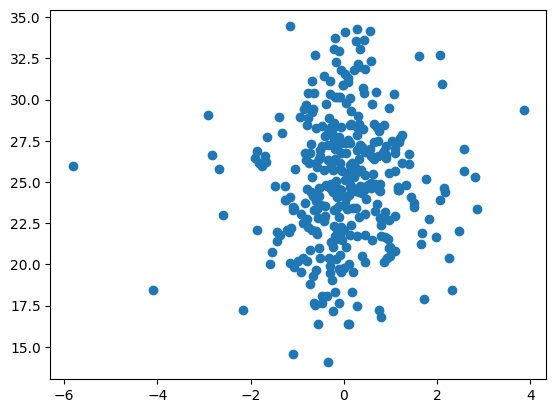

In [ ]:
#plt.scatter(X, model.predict(X))
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
print(r2_score(y, model.predict(X)))
print(mean_absolute_error(y, model.predict(X)))

0.005476352695837017
3.124532958640614
